In [81]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [82]:
def Boxplot(N,L,title,Y_label):
    plt.figure(figsize=(18,6))
    plt.boxplot(N,tick_labels=L)
    plt.title(title)
    plt.ylabel(Y_label)
    plt.show()


In [83]:
# creating two datasets one with outliers and one normal using normal distribution
normal_data = np.random.normal(5,2,1000)
power_data = np.random.power(0.5, 1000) 
geometric_data = np.random.geometric(0.5, 1000)
outliers_data = np.copy(normal_data)
power_data1 = np.copy(power_data)
geometric_data1 = np.copy(geometric_data)

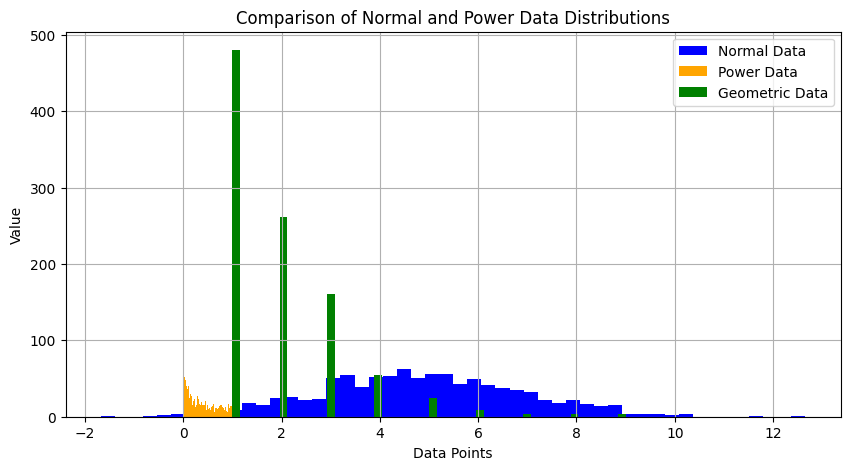

In [84]:
plt.figure(figsize=(10, 5))
plt.hist(normal_data,bins=50, label='Normal Data', color='blue')
plt.hist(power_data, bins=50,label='Power Data', color='orange')
plt.hist(geometric_data, bins=50, label='Geometric Data', color='green')
plt.title('Comparison of Normal and Power Data Distributions')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [85]:
outliers = np.random.normal(300,1,50)

In [86]:
def analyze_data(outliers_data):
    # Calculate basic statistics
    stats = [
         np.mean(outliers_data),
         np.median(outliers_data),
         np.std(outliers_data),
         np.percentile(outliers_data, 75) - np.percentile(outliers_data, 25)
    ]
    return stats


In [87]:
# create a variable to store stats after each iteration
mean_stats = np.array([])
std_stats = np.array([])
iqr_stats = np.array([])
median_stats = np.array([])

stats = analyze_data(outliers_data)
mean_stats = np.append(mean_stats, stats[0])
std_stats = np.append(std_stats, stats[2])
iqr_stats = np.append(iqr_stats, stats[3])
median_stats = np.append(median_stats, stats[1])

# add each outlier one by one
for outlier in outliers:
    outliers_data = np.append(outliers_data, outlier)
    # print(outliers_data.size)
    stats = analyze_data(outliers_data)

    mean_stats = np.append(mean_stats, stats[0])
    std_stats = np.append(std_stats, stats[2])
    iqr_stats = np.append(iqr_stats, stats[3])
    median_stats = np.append(median_stats, stats[1])

mean_stats_power = np.array([])
std_stats_power = np.array([])
iqr_stats_power = np.array([])
median_stats_power = np.array([])

for outlier in outliers:
    power_data = np.append(power_data, outlier)
    stats = analyze_data(power_data)

    mean_stats_power = np.append(mean_stats_power, stats[0])
    std_stats_power = np.append(std_stats_power, stats[2])
    iqr_stats_power = np.append(iqr_stats_power, stats[3])
    median_stats_power = np.append(median_stats_power, stats[1])

mean_stats_geometric = np.array([])
std_stats_geometric = np.array([])
iqr_stats_geometric = np.array([])
median_stats_geometric = np.array([])

for outlier in outliers:
    geometric_data = np.append(geometric_data, outlier)
    stats = analyze_data(geometric_data)

    mean_stats_geometric = np.append(mean_stats_geometric, stats[0])
    std_stats_geometric = np.append(std_stats_geometric, stats[2])
    iqr_stats_geometric = np.append(iqr_stats_geometric, stats[3])
    median_stats_geometric = np.append(median_stats_geometric, stats[1])


In [88]:
stats = analyze_data(outliers_data)

z_scaled_data = (outliers_data - stats[0]) / stats[2] 

r_scaled_data = (outliers_data - stats[1]) / stats[3]

In [89]:
stats = analyze_data(power_data)

z_scaled_data_power  = (power_data - stats[0]) / stats[2]

r_scaled_data_power = (power_data - stats[1]) / stats[3]

In [90]:
stats = analyze_data(geometric_data)

z_scaled_data_geometric  = (geometric_data - stats[0]) / stats[2]

r_scaled_data_geometric = (geometric_data - stats[1]) / stats[3]

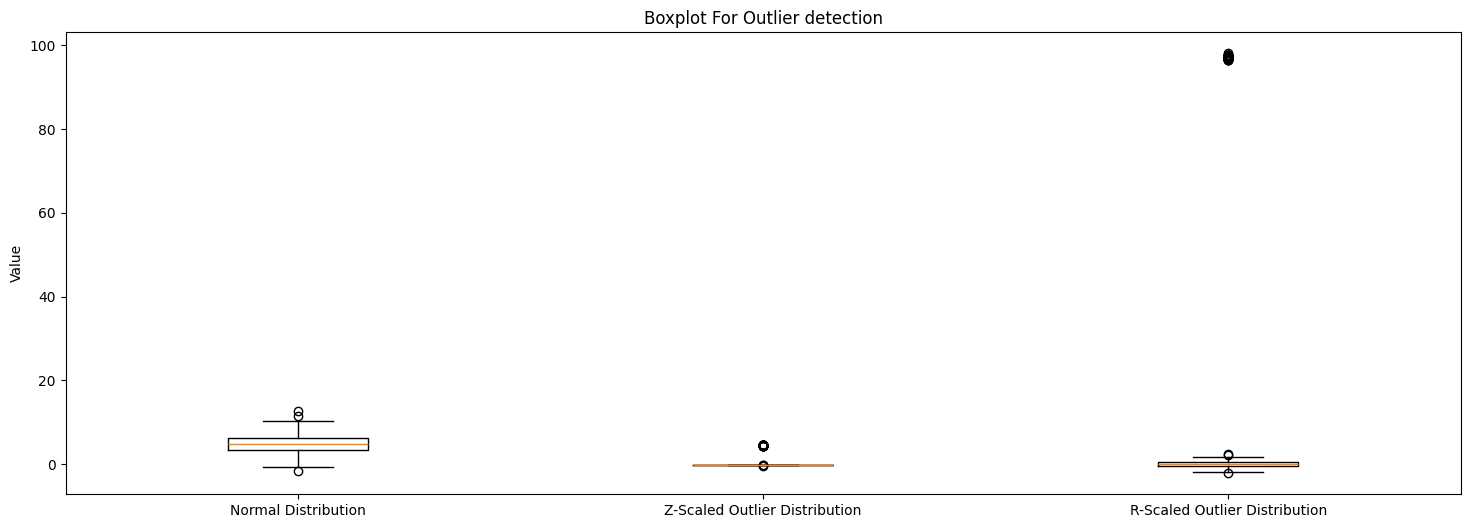

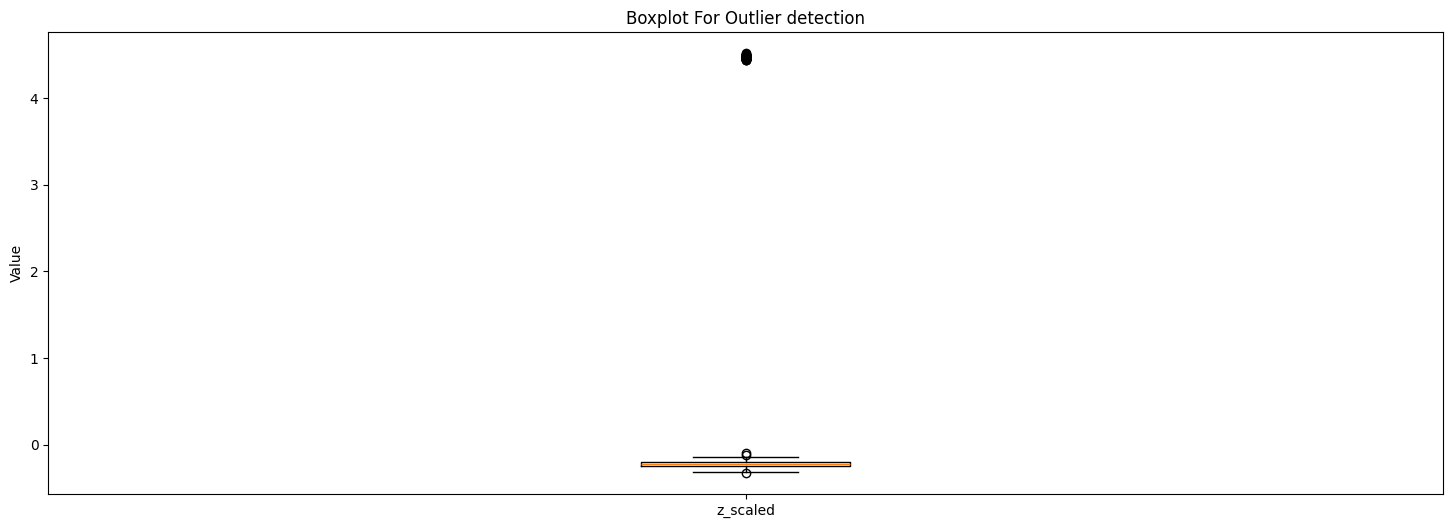

In [91]:
Boxplot([normal_data, z_scaled_data, r_scaled_data],['Normal Distribution', 'Z-Scaled Outlier Distribution', 'R-Scaled Outlier Distribution'],'Boxplot For Outlier detection','Value')
Boxplot([z_scaled_data],['z_scaled'],'Boxplot For Outlier detection','Value')

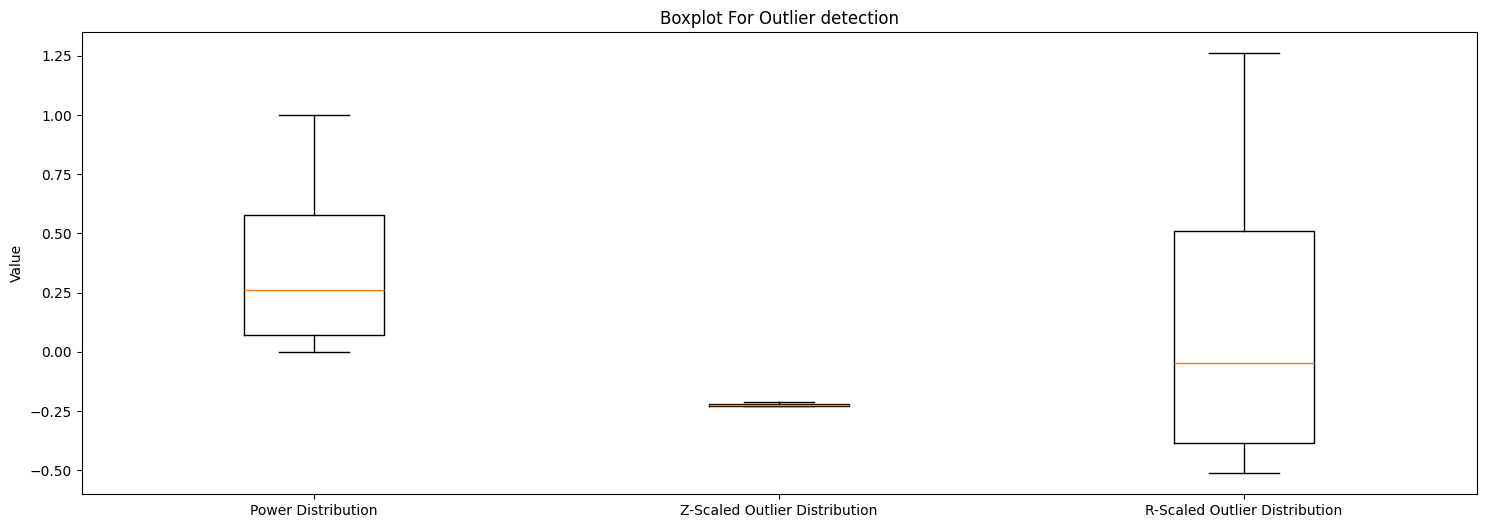

In [92]:
Boxplot([power_data1, z_scaled_data_power[:1000], r_scaled_data_power[:1000]],['Power Distribution', 'Z-Scaled Outlier Distribution', 'R-Scaled Outlier Distribution'],'Boxplot For Outlier detection','Value')
# Boxplot([z_scale],['z_scaled'],'Boxplot For Outlier detection','Value')

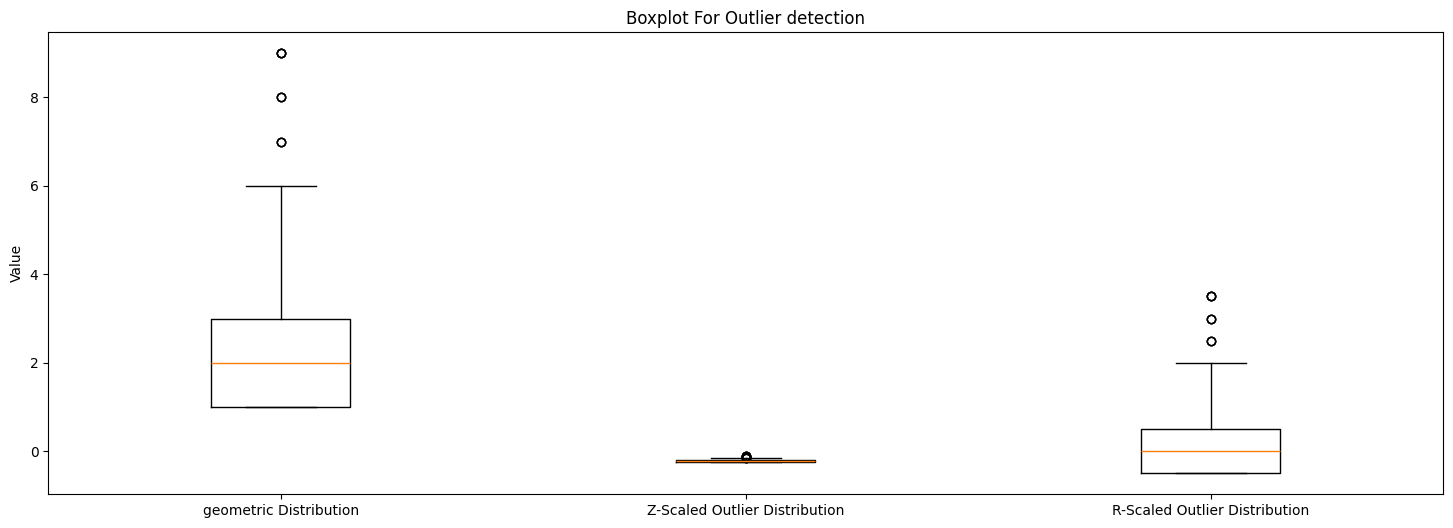

In [93]:
Boxplot([geometric_data1, z_scaled_data_geometric[:1000], r_scaled_data_geometric[:1000]],['geometric Distribution', 'Z-Scaled Outlier Distribution', 'R-Scaled Outlier Distribution'],'Boxplot For Outlier detection','Value')

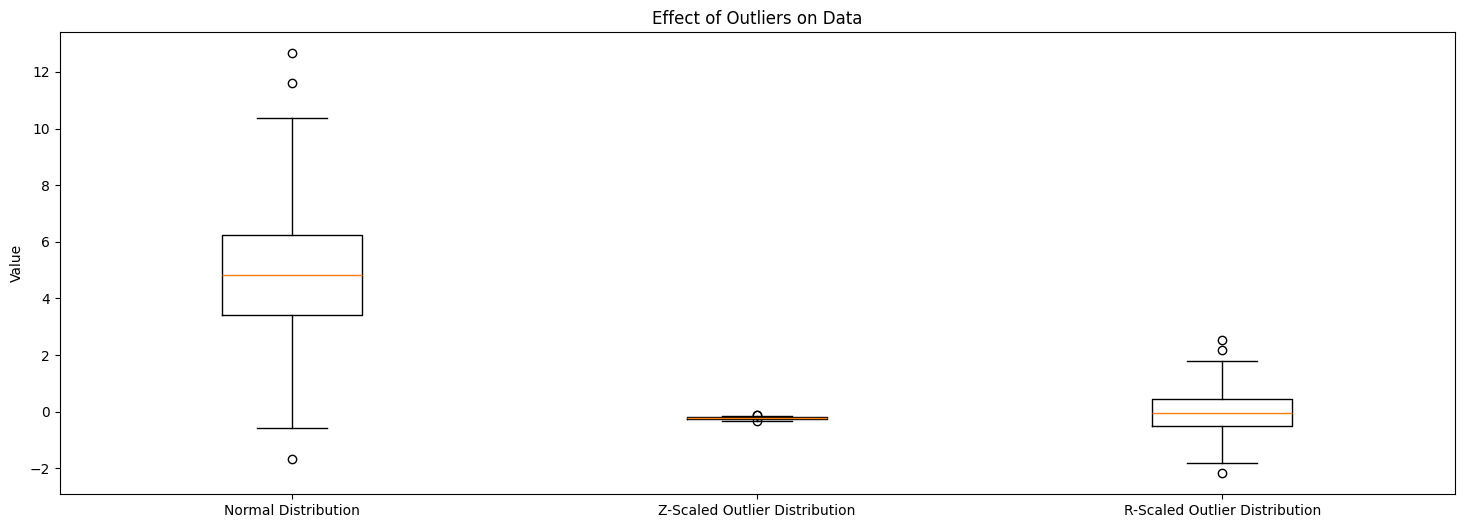

In [94]:
Boxplot([normal_data , z_scaled_data[:1000], r_scaled_data[:1000]],['Normal Distribution', 'Z-Scaled Outlier Distribution', 'R-Scaled Outlier Distribution'],'Effect of Outliers on Data','Value')

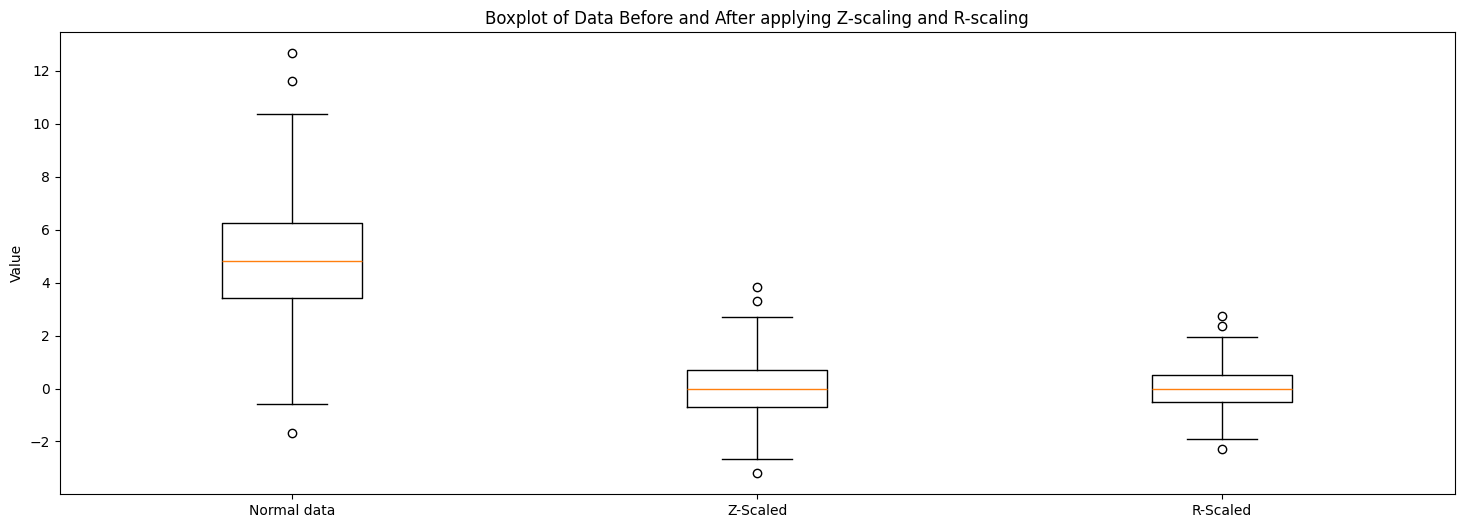

In [95]:
normal_stats = analyze_data(normal_data)
# scaling normal distribution values
normal_z_scaling = (normal_data- normal_stats[0])/normal_stats[2]
normal_r_scaling = (normal_data - normal_stats[1])/normal_stats[3]

Boxplot([normal_data,normal_z_scaling,normal_r_scaling],["Normal data","Z-Scaled","R-Scaled"],"Boxplot of Data Before and After applying Z-scaling and R-scaling","Value")
 

In [96]:
print(mean_stats[:5])
print(std_stats[:5])
print(iqr_stats[:5])
print(median_stats[:5])

[4.84876393 5.14227941 5.43699454 5.73012301 6.02524869]
[ 2.03890231  9.50285792 13.31007321 16.21966619 18.71299035]
[2.84530073 2.85037221 2.84946919 2.85565086 2.8653673 ]
[4.83291963 4.8377176  4.83958169 4.84144577 4.84317006]


In [97]:
log_n = np.array([])
for i in range (1,51) :
    log_n = np.append(log_n,math.sqrt(i))

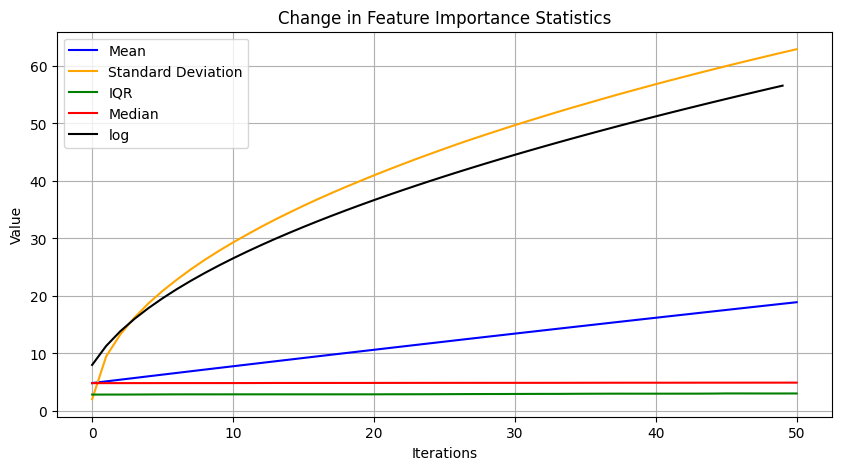

In [98]:
# plotting mean change
plt.figure(figsize=(10, 5))
plt.plot(mean_stats, label='Mean', color='blue')
plt.plot(std_stats, label='Standard Deviation', color='orange')
plt.plot(iqr_stats, label='IQR', color='green')
plt.plot(median_stats, label='Median', color='red')
plt.plot(8*log_n,label ='log',color ='black')
plt.title('Change in Feature Importance Statistics')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

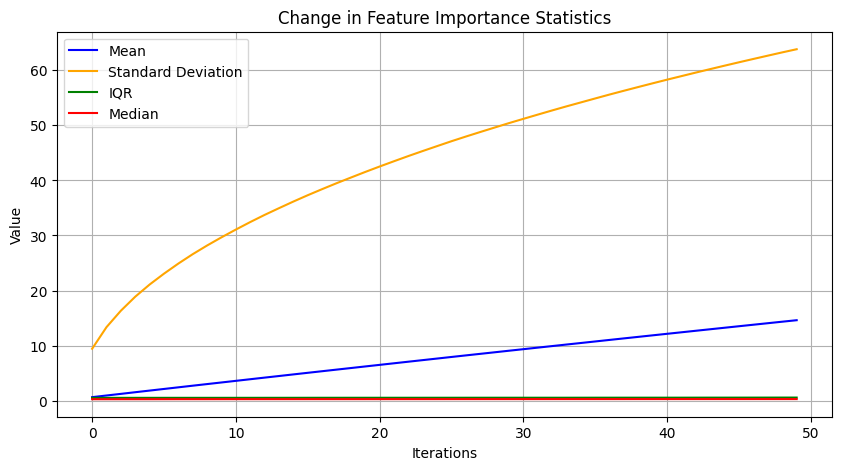

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(mean_stats_power, label='Mean', color='blue')
plt.plot(std_stats_power, label='Standard Deviation', color='orange')
plt.plot(iqr_stats_power, label='IQR', color='green')
plt.plot(median_stats_power, label='Median', color='red')
plt.title('Change in Feature Importance Statistics')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

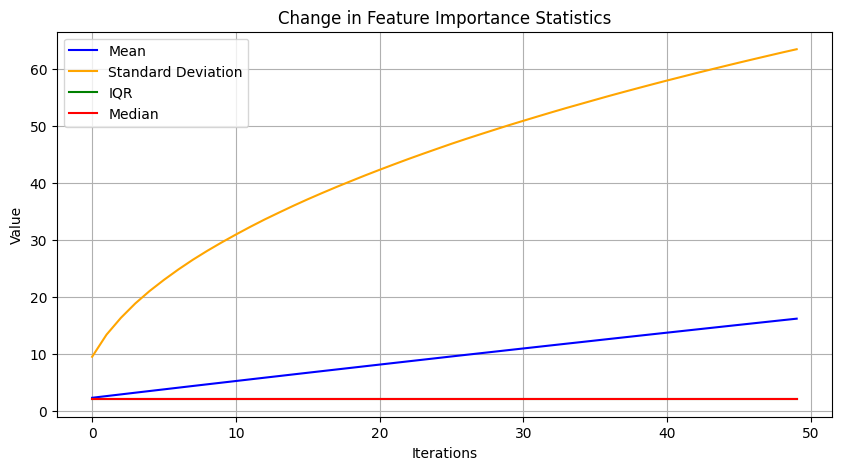

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(mean_stats_geometric, label='Mean', color='blue')
plt.plot(std_stats_geometric, label='Standard Deviation', color='orange')
plt.plot(iqr_stats_geometric, label='IQR', color='green')
plt.plot(median_stats_geometric, label='Median', color='red')
plt.title('Change in Feature Importance Statistics')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()